In [7]:
from __future__ import division
import math, random, re
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt

In [1]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]


In [4]:
    def text_size(total):
        """equals 8 if total is 0, 28 if total is 200"""
        return 8 + total / 200 * 20

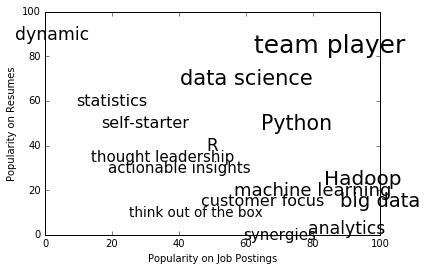

In [8]:
for word, job_popularity, resume_popularity in data:
        plt.text(job_popularity, resume_popularity, word,
                 ha='center', va='center',
                 size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.show()

In [9]:
def fix_unicode(text):
    return text.replace(u"\u2019", "'")

In [20]:


from bs4 import BeautifulSoup
import requests
url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "article-body")   # find entry-content div
regex = r"[\w']+|[\.]"                        # matches a word or a period

document = []

for paragraph in content("p"):
    words = re.findall(regex, paragraph.text)
    document.extend(words)

In [18]:
type(html.decode('utf-8'))

unicode

In [31]:
html


u'<!DOCTYPE html>\n<html lang="en">\n<head>\n  <title>What is data science? - O&#39;Reilly Media</title>\n\n  <!-- Meta -->\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n      <meta property="twitter:card" content="summary_large_image" />\n      <meta property="twitter:site" content="@OReillyMedia" />\n      <meta property="twitter:title" content="What is data science?" />\n      <meta property="twitter:description" content="The future belongs to the companies and people that turn data into products." />\n      <meta property="description:site" content="The future belongs to the companies and people that turn data into products." />\n      <meta property="twitter:url" content="https://www.oreilly.com/ideas/what-is-data-science" />\n      <meta property="fb:pages" content="15137500430" />\n      <meta property="og:type" content="article" />\n      <meta property="og:site_name" content="O&#39;Reilly Media" />\n      <meta property="og:

In [32]:
bigrams = zip(document, document[1:])
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)

In [34]:
transitions['very']

[u'useful', u'flexible', u'effective', u'difficult', u'broadly']

In [35]:
def generate_using_bigrams():
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done

In [36]:
generate_using_bigrams()

u'Facebook possibly sorting them open source R was ignored .'

In [40]:
generate_using_bigrams()

u'They have been hampered by analyzing an ill advised mobile application with the next Intel Inside .'

In [41]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in trigrams:

    if prev == ".":              # if the previous "word" was a period
        starts.append(current)   # then this is a start word

    trigram_transitions[(prev, current)].append(next)

In [44]:
trigram_transitions

defaultdict(list,
            {(u'developers', u'and'): [u'consumers'],
             (u'and', u'Factual'): [u'provide'],
             (u'musical', u'tastes'): [u'though'],
             (u'you', u'have'): [u'a',
              u'to',
              u'to',
              u'is',
              u'no',
              u'already',
              u'1'],
             (u'.', u'A'): [u'data', u'picture'],
             (u'conditioning', u'or'): [u'getting'],
             (u'few', u'examples'): [u'Google'],
             (u'job', u'postings'): [u'in'],
             (u'library', u'can'): [u'make'],
             (u'calculation', u'it'): [u'might'],
             (u'on', u'a'): [u'map', u'public'],
             (u'value', u'in'): [u'doing'],
             (u'and', u'about'): [u'data'],
             (u'to', u'develop'): [u'and', u'training'],
             (u'attended', u'.'): [u'Then'],
             (u'single', u'reduce'): [u'task'],
             (u'is', u'showing'): [u'up'],
             (u'science', u'what'):

In [45]:
def generate_using_trigrams():
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)

        prev, current = current, next_word
        result.append(current)

        if current == ".":
            return " ".join(result)

In [47]:
generate_using_trigrams()

u'Whether it s possible to pursue intriguing possibilities that you d like .'

### Grammars

In [48]:
grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

In [49]:
def is_terminal(token):
    return token[0] != "_"

In [50]:
def expand(grammar, tokens):
    for i, token in enumerate(tokens):

        # skip over terminals
        if is_terminal(token): continue

        # if we get here, we found a non-terminal token
        # so we need to choose a replacement at random
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]

        # now call expand on the new list of tokens
        return expand(grammar, tokens)

    # if we get here we had all terminals and are done
    return tokens

In [51]:
def generate_sentence(grammar):
    return expand(grammar, ["_S"])

In [54]:
generate_sentence(grammar)

['big', 'Python', 'near', 'logistic', 'regression', 'tests']

### Gibbs Sampling

In [55]:
def roll_a_die():
    return random.choice([1,2,3,4,5,6])

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

In [57]:
direct_sample()

(4, 10)

In [58]:
def random_y_given_x(x):
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()


In [59]:
def random_x_given_y(y):
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

In [60]:
import random
random.randrange(11, 7)

ValueError: empty range for randrange() (11,7, -4)

In [61]:
def gibbs_sample(num_iters=100):
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

In [62]:
def compare_distributions(num_samples=1000):
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

In [63]:
counts =compare_distributions()

<Container object of 36 artists>

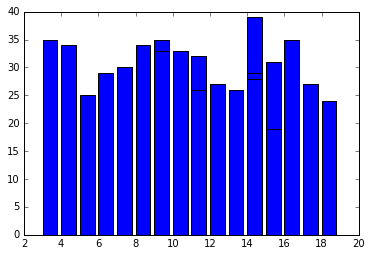

In [69]:
from matplotlib import pyplot as plt

keys =sorted(counts.keys(),key=lambda(x,y): x+y)
xs = [x+y for x,y in keys]
plt.bar(xs, [counts[k][0] for k in keys])


<Container object of 36 artists>

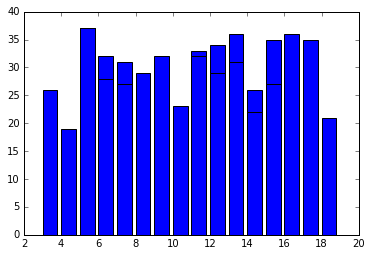

In [70]:
plt.bar(xs, [counts[k][1] for k in keys])


### Topic Modelling

In [73]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

K = 4

document_topic_counts = [Counter()
                         for _ in documents]

topic_word_counts = [Counter() for _ in range(K)]

topic_counts = [0 for _ in range(K)]

document_lengths = map(len, documents)

distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

D = len(documents)


In [75]:
def sample_from(weights):
    """returns i with probability weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random()      # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                       # return the smallest i such that
        if rnd <= 0: return i          # weights[0] + ... + weights[i] >= rnd

In [79]:
sample_from([1,1,3])

0

In [80]:
def p_topic_given_document(topic, d, alpha=0.1):
    """the fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)"""

    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    """the fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)"""

    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

In [81]:
def topic_weight(d, word, k):
    """given a document and a word in that document,
    return the weight for the kth topic"""

    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

In [85]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [86]:
document_topics

[[3, 3, 1, 1, 2, 1, 3],
 [1, 1, 2, 3, 2],
 [1, 3, 2, 1, 3, 3],
 [3, 3, 1, 2, 3],
 [2, 1, 0, 1],
 [2, 3, 3, 1, 3, 1],
 [3, 2, 0, 2],
 [1, 3, 2, 0],
 [1, 3, 0, 1],
 [3, 0, 2, 0],
 [3, 3, 1],
 [0, 1, 2, 3],
 [0, 2, 2],
 [2, 3, 2, 3, 2],
 [2, 1, 2]]

In [87]:
for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

In [88]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0: print k, word, count

0 Big Data 4
0 Java 2
0 neural networks 2
0 mathematics 2
0 pandas 2
0 decision trees 2
0 Hadoop 1
0 C++ 1
1 Python 3
1 artificial intelligence 3
1 libsvm 3
1 C++ 3
1 machine learning 3
1 Java 2
1 neural networks 2
1 NoSQL 2
1 Storm 2
1 regression 2
1 statistics 2
1 programming languages 2
1 deep learning 2
1 numpy 2
1 HBase 2
1 MongoDB 2
1 scipy 1
1 statsmodels 1
2 regression 4
2 Postgres 4
2 Python 3
2 Mahout 2
2 theory 2
2 R 2
2 MongoDB 2
2 MapReduce 2
2 support vector machines 2
2 probability 1
2 MySQL 1
2 Haskell 1
2 Spark 1
2 artificial intelligence 1
2 libsvm 1
2 machine learning 1
2 scipy 1
2 databases 1
2 Cassandra 1
3 R 6
3 probability 5
3 statistics 4
3 HBase 4
3 scikit-learn 4
3 Hadoop 3
3 statsmodels 3
3 Cassandra 3
3 Java 2
3 Python 2
3 deep learning 2
3 pandas 2
3 Big Data 2
3 MySQL 1
3 Spark 1
3 Haskell 1
3 databases 1


In [89]:
topic_names = ["Big Data",
               "Python",
               "Postgres",
               "R and "]

In [90]:
for document, topic_counts in zip(documents, document_topic_counts):
    print document
    for topic, count in topic_counts.most_common():
        if count > 0:
            print topic_names[topic], count,
    print

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
R 8 Python 5 Postgres 1
['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python 5 Postgres 3 R 2
['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
R 6 Python 5 Postgres 1
['R', 'Python', 'statistics', 'regression', 'probability']
R 5 Python 3 Postgres 2
['machine learning', 'regression', 'decision trees', 'libsvm']
Python 4 Big Data 2 Postgres 2
['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
R 6 Python 4 Postgres 2
['statistics', 'probability', 'mathematics', 'theory']
Postgres 3 R 3 Big Data 2
['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Python 3 Postgres 2 R 2 Big Data 1
['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
Python 4 Big Data 3 R 1
['Hadoop', 'Java', 'MapReduce', 'Big Data']
Big Data 5 Postgres 2 R 1
['statistics', 'R', 'statsmodels']
R 5 Python 1
['C++', 'deep learning', 'artificial intelligence', 'probability